Osnabrück University - A&C: Computational Cognition (Summer Term 2019)

# Exercise Sheet 02: Basic statistics

## Introduction

This week's sheet should be solved and handed in at 14:00 at **Tuesday, April 30, 2019**. If you need help (and Google and other resources were not enough), feel free to contact your tutors. Please push your results to your Github group folder.

In this exercise sheet you will have to work with ```pandas``` and ```seaborn```. ```pandas``` is one of the most preferred and widely used tools in data processing. What’s cool about ```pandas``` is that it takes data (like a CSV or TSV file, or a SQL database) and creates a Python object with rows and columns called 'data frame' that looks very similar to tables in a statistical software (think Excel or SPSS for example). ```pandas``` makes data processing a lot easier in comparison to working with lists and/or dictionaries through for-loops or list comprehension.  
```seaborn``` is a library for making plots. It is based on ```matplotlib``` but offers more functions speicialized for statistical visualization. Also most people agree that ```seaborn``` looks more legit.

Don't forget that you we will also give **2 points** for nice coding style!

## Assignment 0: Peer review for sheet 01 [3 pts]

Beginning this week you will have to make a peer review of the other groups' solutions. Each group reviews the solutions of two other groups and give points according to the given point distribution considering the correctness of the solution. For this reviews the tutors will give you up to 3 points each week.

| * |Group 1|Group 2|Group 3|Group 4|Group 5|Group 6|Group 7|Group 8|Group 9|Group 10|Group 11|
| ------- | ----- | ----- | ----- | ----- | ----- | ----- | ----- | ----- | ----- | ------ | ------ |
| check solutions of group: | 10, 7 | 4, 9  | 1, 4  | 11, 1 | 8, 11 | 5, 3  | 9, 10 | 6, 5  | 3, 2  | 2, 8   | 7, 6   |

You should open an issue in repositories of groups you have to check. The title of the issue should be your group name (e.g."Group 1"). Comments on what was good and bad, how much points they get etc.  
Refer to https://guides.github.com/features/issues/ to learn more about issues.

## Assignment 1: Dataframes [4 pts]

In [1]:
# import libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
# config pandas error warnings
pd.options.mode.chained_assignment = None 

```matplotlib``` and ```seaborn``` should already be installed in your environment. If not please run:
```sh
pip install seaborn
```

### a) Importing a csv file [2 pts]

Import the csv files of all subjects into one dataframe. Make sure that each row has a unique index. You might want to take a look at what ***pandas.concat*** does.<br>
Extra fun: Display the output of the dataframe using the ***pandas.set_option*** function to display the data in a well-arranged way. Play a little bit around with the settings that you are allowed to change.<br>
Save ```df_concatenated```.


In [2]:
import glob
import os

#get files and put them in a Dataframe
PATH = os.getcwd()+ "/Data"
all_files = glob.glob(os.path.join(PATH, "*.csv"))     
                                                         
df_list = [pd.read_csv(file) for file in all_files]             # reads in all .csv files and saves them as dataframes in a list
df_concatenated = pd.concat(df_list)                            # concatenats all dataframes into one
df_concatenated.sort_values('SubjectID', inplace=True)          # sorts the Dataframe according to the SubjectIDs
# change SubjectID to SubjectID convention
df_concatenated['SubjectID'] = 7000 + df_concatenated['SubjectID'].astype(int) 
df_concatenated.reset_index(drop=True,inplace=True)             # Updates the index in an ascending way

# use pd.set_option here to display in a nice way
pd.set_option('mode.sim_interactive', True)                     # you can scroll all the data
pd.set_option('expand_frame_repr', True)

# save concatenated dataframe
outname = 'data_concatenated.csv'                               # output name
outdir = './Processed'                                          # output dircetory

# checks if output directory exists, if not, creates it                                                        
if not os.path.exists(outdir):                         
    os.mkdir(outdir)

fullname = os.path.join(outdir, outname)               # creats the full name, i.e. directory + filename
df_concatenated.to_csv(fullname)                       # saves the dataframe as .csv

#print Dataframe
df_concatenated

,SubjectID,StimulusType,response,RT
0,7001,1,1,453
1,7001,1,1,322
2,7001,1,1,286
3,7001,1,1,87
4,7001,1,1,268
5,7001,1,1,435
6,7001,0,1,18
7,7001,1,1,217
8,7001,1,1,36
9,7001,1,1,333


### b) Working with dataframes [2 pts]

- Add a column called "congruence" to ```df_concatenated```. The column should have a value *True* if "StimulusType" and "reponse" matches. Otherwise the column should have a value *False*.

- Create a new dataframe which has "SubjectID","StiumulusType","RT" and "congruence" as a column. For each combination of "SubjectID" and "StimulusType" (e.g. "7001" and "0") compute the average RT and congruence level.

- When computing the average RT, omit all reaction times which are 0 as these will manipulate the mean.

- Rename "congruence" as "accuracy" and save the dataframe as a csv file. 

In [44]:
#creates column congruence according to it's above given definition
#as boolean, because can only be true or false
df_concatenated['congruence'] = (df_concatenated['StimulusType'] == df_concatenated['response']).astype(bool)

# create a new dataframe with averaged data
df_concatenated_avg = df_concatenated[['SubjectID','StimulusType','RT','congruence']] #specifies which columns to keep
df_concatenated_avg['RT'].replace(0, np.NaN, inplace=True)                            #replace zeros with NaNs
df_concatenated_avg = df_concatenated_avg.groupby(['SubjectID','StimulusType']).mean().reset_index()    #computes the means
df_concatenated_avg.rename(columns={'congruence': 'accuracy'}, inplace=True)          #renames congruence to accuracy

# save averaged dataframe
df_concatenated_avg.to_csv('./Processed/data_concatenated_averaged.csv')              #saves new dataframe to Processed

#print new Dataframes head
df_concatenated_avg.head()

,SubjectID,StimulusType,RT,accuracy
0,7001,0,181.833333,0.4000
1,7001,1,297.164557,0.9875
2,7002,0,278.777778,0.5500
3,7002,1,351.169014,0.8875
4,7003,0,381.000000,0.9500


## Assignment 2: Statistical plotting [6 pts]

### a) Boxplot and Violinplot [2 pts]

Plot the RT of each trial for all subjects as a stripplot and a boxplot on top of each other. Do the same with a striplot and a violinplot. Plot go trials as green dots and no-go trails as red dots. Reminder: don't forget to mask the data where RT=0. Make sure that the legends are informative (Don't display duplicated legends).

     Unnamed: 0  SubjectID  StimulusType  response     RT
0             0       7001             1         1  453.0
1             1       7001             1         1  322.0
2             2       7001             1         1  286.0
3             3       7001             1         1   87.0
4             4       7001             1         1  268.0
5             5       7001             1         1  435.0
6             6       7001             0         1   18.0
7             7       7001             1         1  217.0
8             8       7001             1         1   36.0
9             9       7001             1         1  333.0
10           10       7001             0         1   62.0
11           11       7001             1         1   34.0
12           12       7001             1         1   33.0
13           13       7001             1         1  185.0
14           14       7001             1         1   18.0
15           15       7001             1         1  267.0
16           1

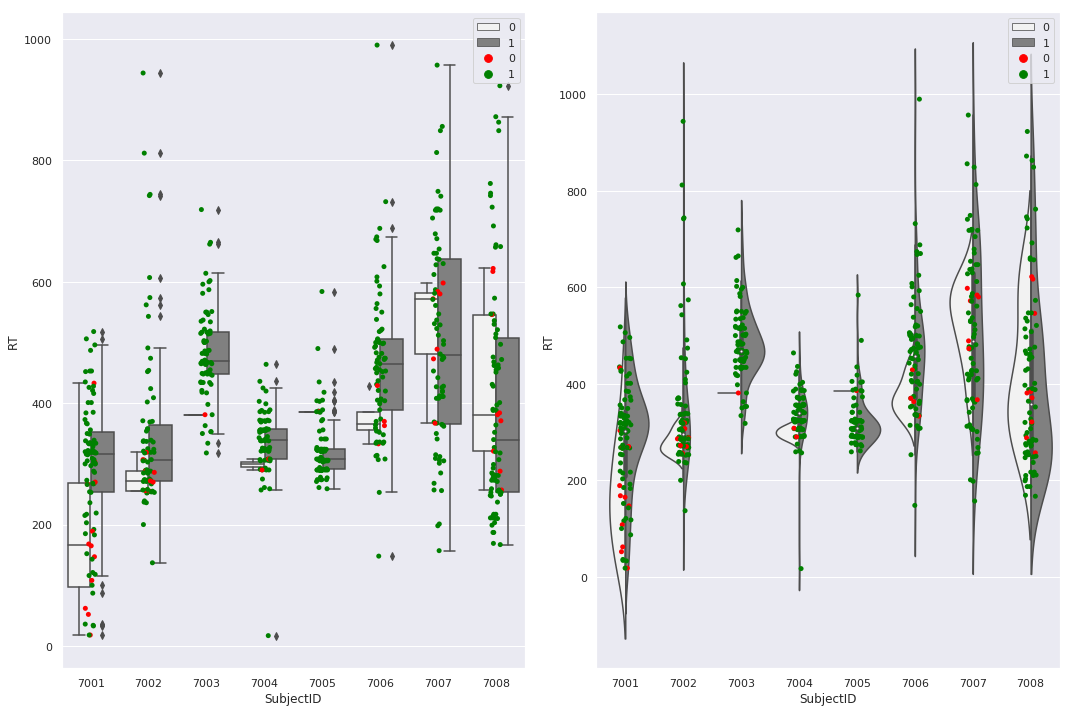

In [35]:
# read data
data_concat = pd.read_csv(os.getcwd() + "/Processed/data_concatenated.csv")
data_concat['RT'].replace(0, np.NaN, inplace=True)                            #replace zeros with NaNs
# create two axes
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(15,10))

# first subplot with stripplot and boxplot
sns.stripplot(data = data_concat, x='SubjectID', y='RT', hue='StimulusType',ax=axes[0],palette=('red','green'))
sns.boxplot(data = data_concat, x='SubjectID', y='RT', hue='StimulusType',ax=axes[0],color='grey')

# second subplot with stripplot and violinplot
sns.stripplot(data = data_concat, x='SubjectID', y='RT', hue='StimulusType',ax=axes[1],palette=('red','green'))
sns.violinplot(data = data_concat, x='SubjectID', y='RT', hue='StimulusType',color='grey', split=True,ax=axes[1],Legend=False)

# handling legends, one legend per plot
# for the first plot
handles, labels = axes[0].get_legend_handles_labels()
axes[0].legend(handles, labels[0:4])

# for the second plot
handles, labels = axes[1].get_legend_handles_labels()
axes[1].legend(handles, labels[0:4])

fig.tight_layout()

### b) Violinplot combining all data of all groups [3 pts]

- Make a dataframe consisting of all data across groups. You already did this in 1.a). At the end this dataframe you should have 8 * 11 * 100 rows.

- Every group has used their ID convention. Make sure that every data point follows this SubjectID system: group number + "00" + subject number.  
e.g) 3002 for the second subject of the third group.

- Compute average RT and accuaracy for each subject in the big dataframe you just created. You already did this in 1.b). At the end this dataframe will have 8 * 11 rows.

- On the first column plot average RT and accuracy for 8 subjects from your group's data. Use violinplot and split go/no-go conditions.

- On the second column plot average RT and accuracy for 80 subjects from all data. Use violinplot and split go/no-go conditions.

- Do you see any difference between the first column and the second column? What does this tell us about the central limit theorem (CLT) ?

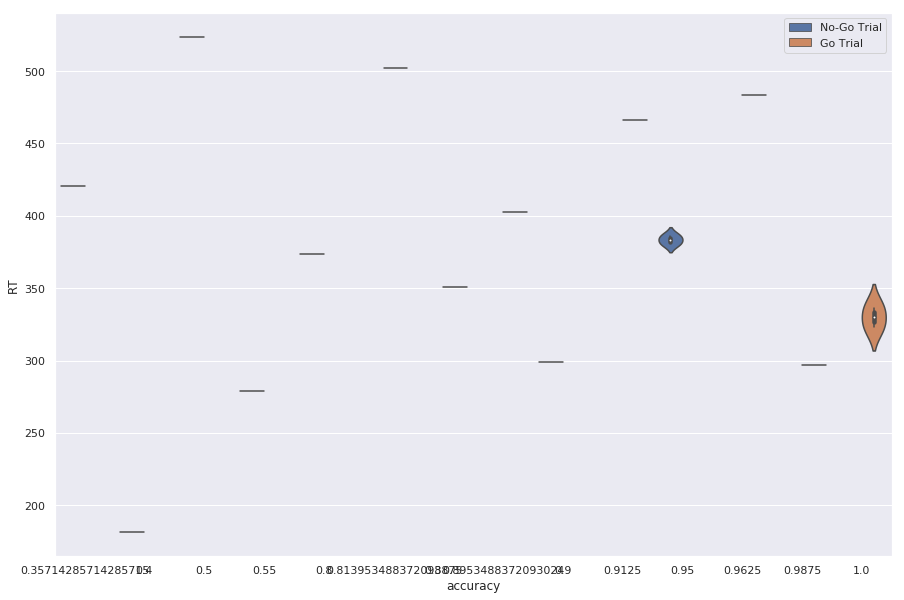

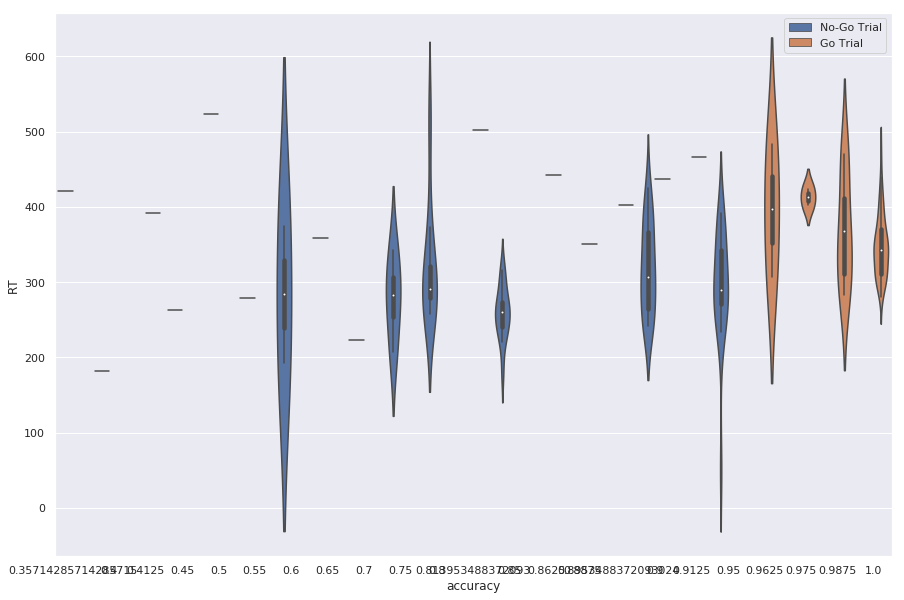

In [79]:
# again create a concatenated dataframe over all (averaged) groups.
# Don't forget to modify the Subject ID

# crawl through directories to get all .csv paths
PATH = os.getcwd()+ "/Experimental_Data"
parent_dir = PATH
subject_dirs = [os.path.join(parent_dir, dir) for dir in os.listdir(parent_dir) if os.path.isdir(os.path.join(parent_dir, dir))]

# create dataframe of all .csv files found, also adds a column 'filename', used later as subjectIDs  
filelist = []
for dir in subject_dirs:
    csv_files = [os.path.join(dir, csv) for csv in os.listdir(dir) if os.path.isfile(os.path.join(dir, csv)) and csv.endswith('.csv')]
    for file in csv_files:
        csv = pd.read_csv(file)
        filename = int(''.join(filter(str.isdigit, os.path.basename(file))))
        csv['filename'] = filename
        filelist.append(csv)

bigframe = pd.concat(filelist)

# editing of dataframe in order to work with it and in order to stick to our conventions and specifications
bigframe['SubjectID']= bigframe['filename']              # filenames correspond to SubjectIDs convention, makes them the new SubjectIDs
bigframe.drop(["filename"], axis=1,inplace=True)         # drops column filenames
bigframe.sort_values('SubjectID', inplace=True)          # sorts the Dataframe according to the SubjectIDs
bigframe.reset_index(drop=True,inplace=True)             # updates the index
# inserts column accuracy
bigframe['accuracy'] = (bigframe['StimulusType'] == bigframe['response']).astype(bool)

# create a new dataframe with averaged data
bigframe_avg = bigframe[['SubjectID','StimulusType','RT','accuracy']]  #specifies which columns to keep
bigframe_avg['RT'].replace(0, np.NaN, inplace=True)                      #replace zeros with NaNs
bigframe_avg = bigframe_avg.groupby(['SubjectID','StimulusType']).mean().reset_index() #computes the means


# Now it's time to plot your results
#figs, axes = plt.subplots(nrows=2, ncols=2, sharey="row",figsize=(15,10))
fig1, axe1 = plt.subplots(sharey="row",figsize=(15,10))
# violin plot for your group's data
data_concat_group = pd.read_csv(os.getcwd() + "/Processed/data_concatenated_averaged.csv") #gets my groups data 

axe1 = sns.violinplot(data = data_concat_group, x = 'accuracy', y = 'RT', hue = 'StimulusType')

# violin plot of all group's data
fig2, axe2 = plt.subplots(sharey="row",figsize=(15,10))
axe2 = sns.violinplot(data = bigframe_avg, x = 'accuracy', y = 'RT', hue = 'StimulusType')

# legend editing
handles, _ = axe1.get_legend_handles_labels()
axe1.legend(handles, ['No-Go Trial', 'Go Trial'])

handles, _ = axe2.get_legend_handles_labels()
axe2.legend(handles, ['No-Go Trial', 'Go Trial'])

In the dataset of our own group, we see that the only accumulation of data happens for the accuracy of 0.95 and 1.0. all other values are unique. In the Bigdataset we see multiple accumulations for different accuracy levels. 

The plot of our groups data implies that there is only one average RT across all Subjects, except for an accuracy of 0.95 and 1.0. The plot of the big dataframe gives us a more reasonable insight. If we look at the StimulusType 1, we can clearly see a distribution in the higher accuracy levels and slower reaction times. For the StimulusType 0 in the lower accuracy and faster RTs.

The CLT states that "[...] when independent random variables are added, their properly normalized sum tends toward a normal distribution (informally a "bell curve") even if the original variables themselves are not normally distributed." As we can see, the plot of all groups data resembels a normal distribution way more then the plot of only our groups data.  

### c) Scatterplot [1 pts]

Make a scatterplot comparing RT and accuracy. Do you see some correlation?

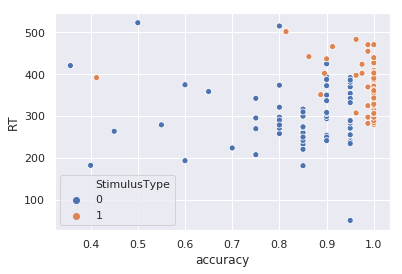

In [84]:
axes = sns.scatterplot(data = bigframe_avg, x = 'accuracy', y = 'RT', hue = 'StimulusType')


accuracy for stimulus type 0(no-go) = low, for stimulus type 1 (go) = high